<a href="https://colab.research.google.com/github/plaban1981/POCs/blob/main/How_to_turn_screenshots_of_a_table_to_editable_data_using_OpenCV_and_pytesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A table detection, cell recognition and text extraction algorithm to convert tables in images to excel files

## text-based PDFs 

#### free solutions. 
    * tabular, 
    * camelot
    * excalibur
    
https://tabula.technology/, 

https://camelot-py.readthedocs.io/en/master/, 

https://excalibur-py.readthedocs.io/en/master/.

In case PDF is image-based or if you find an article with a table online? Why not just take a screenshot and convert it into an excel sheet? Since there seems to be no free or open source software for image-based data (jpg, png, image-based pdf etc.) the idea came up to develop a generic solution to convert tables into editable excel-file

## Getting started

The algorithm consists of three parts: 

    * the first is the table detection and cell recognition with Open CV, 
    * the second the thorough allocation of the cells to the proper row and column and 
    * the third part is the extraction of each allocated cell through Optical Character Recognition (OCR) with pytesseract.

* Clear and detectable lines are necessary for the proper identification of cells. 
* Tables with broken lines, gaps and holes lead to a worse identification and the cells only partially surrounded by lines are not detected. 

In [1]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=f6b2cde86986994f45d0448a9df702de78c8039bb93f16236f1a86edce6e2008
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

## Upload Image

In [3]:
from google.colab import files
files.upload()

Saving Train_data.JPG to Train_data.JPG


{'Train_data.JPG': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x11\x10Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01;\x00\x02\x00\x00\x00\x17\x00\x00\x08J\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08b\x9c\x9d\x00\x01\x00\x00\x00.\x00\x00\x10\xda\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

## Step 1:

* Read the file from the proper path, 
* using thresholding to convert the input image to a binary image and 
* inverting it to get a black background and white lines and fonts.

threshold: 140.0 img_bin shape : (504, 637)


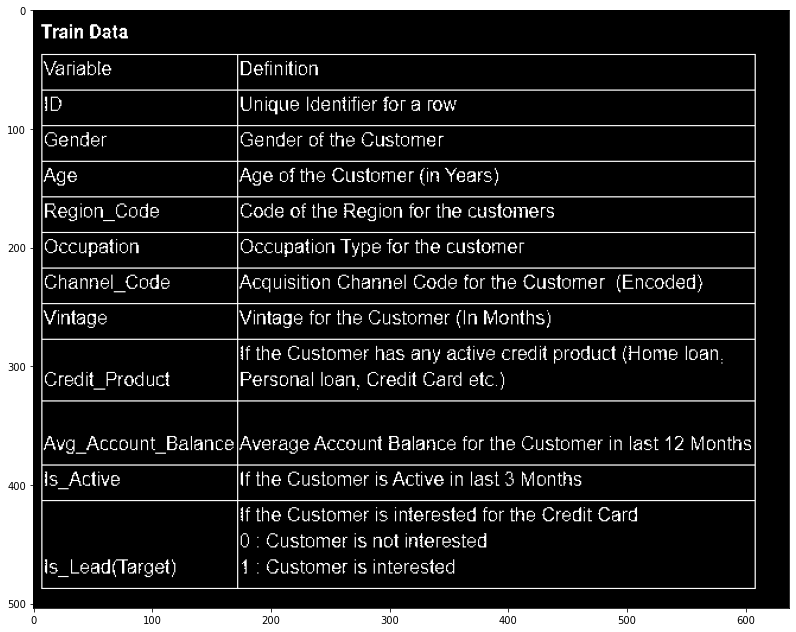

In [4]:
#read your file
file=r'/content/Train_data.JPG'
img = cv2.imread(file,0)
img.shape
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
print(f'threshold: {thresh} img_bin shape : {img_bin.shape}')
#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('/content/cv_inverted.jpeg',img_bin)
#Plotting the image to see the output
plt.figure(figsize=(20,11))
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

## Step 2

Define a kernel to detect rectangular boxes, and followingly the tabular structure. 

* First, we define the length of the kernel and 

* Second the vertical and horizontal kernels to detect 

* Third all vertical lines and all horizontal lines

In [5]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

## Detection of Vertical Lines

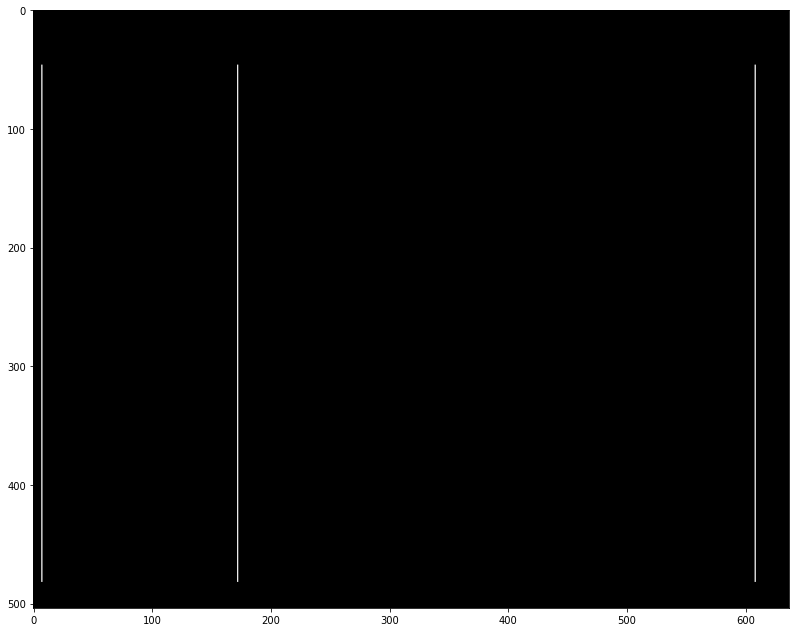

In [6]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("/content/vertical_image.jpeg",vertical_lines)
#Plot the generated image
plt.figure(figsize=(20,11))
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

## Check whether image has horizontal lines

In [14]:
image = cv2.imread('/content/horizontal_image.jpg')
def is_empty(image):
  if image is None:
    print("Image is empty!!")
    result = True
  else:
    print("Image is not empty!!")
    result = False
  return result

In [15]:
is_empty(image)

Image is not empty!!


False

## Detect Horizontal Lines

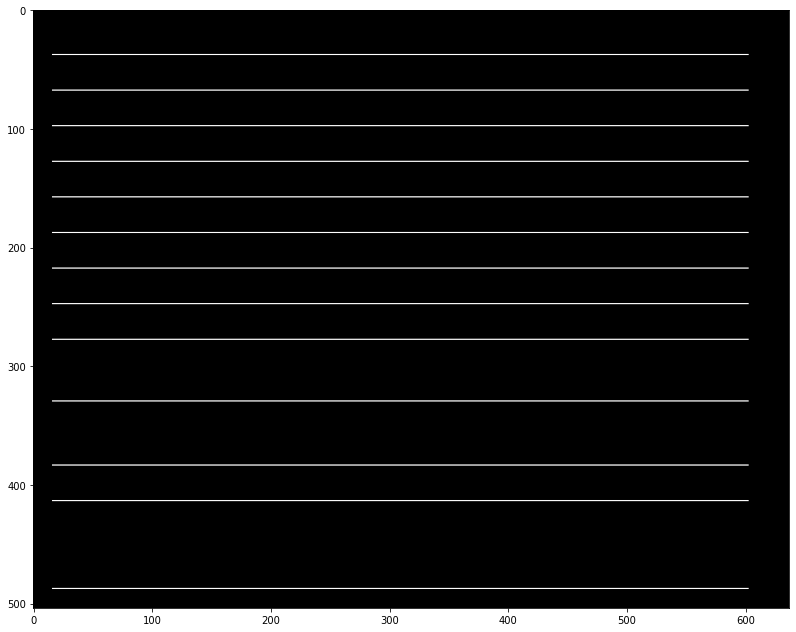

In [16]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("/content/horizontal_image.jpg",horizontal_lines)
#Plot the generated image
plt.figure(figsize=(20,11))
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

In [17]:
vertical_lines.shape 

(504, 637)

In [18]:
horizontal_lines.shape

(504, 637)

## Check whether image has vertical lines

In [19]:
image = "/content/vertical_image.jpeg"
is_empty(image)

Image is not empty!!


False

## Step 3:

* Combine the horizontal and vertical lines to a third image, by weighting both with 0.5. 
* The aim is to get a clear tabular structure to detect each cell.

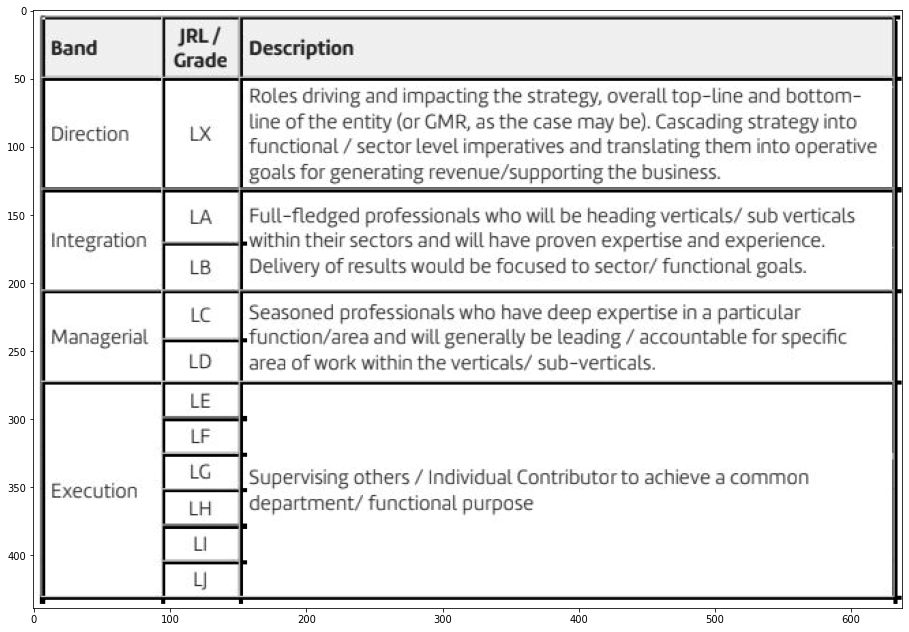

In [8]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("/content/img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plt.figure(figsize=(20,11))
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [9]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## Function to get a sequence of the contours and to sort them from top-to-bottom

In [10]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
      reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
      i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

## Retrieve the cells position proper column and row

* we need to retrieve the height for each cell and store it in the list heights. 
* Then we take the mean from the heights.

In [11]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

638 439
634 434
476 42
54 42
477 78
54 78
85 78
477 71
54 36
85 71
54 32
476 64
54 33
85 64
54 28
477 155
54 23
85 155
54 23
54 23
54 23
54 23
54 23


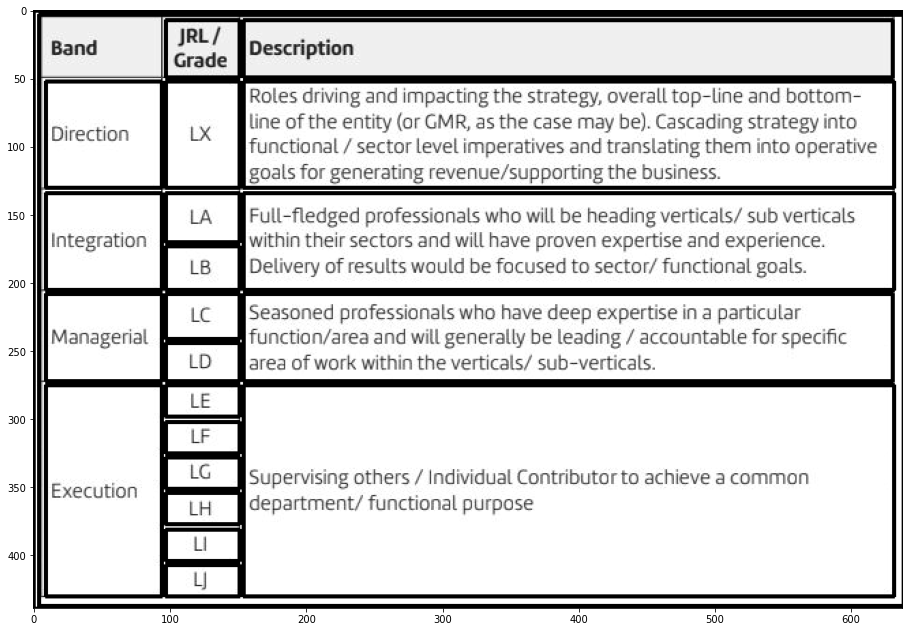

In [14]:
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    print(w,h)
    if (w<700 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])

    
plt.figure(figsize=(20,11))        
plotting = plt.imshow(image,cmap='gray')
plt.show()

* Now we have every cell, its location, height and width we need to get the right location within the table. 

* Therefore, we need to know in which row and which column it is located. 

* As long as a box does not differ more than its own (height + mean/2) the box is in the same row. 

* As soon as the height difference is higher than the current (height + mean/2) , we know that a new row starts. 

* Columns are logically arranged from left to right.

In [15]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print(row)

[[154, 134, 477, 71], [97, 134, 54, 36], [9, 134, 85, 71], [97, 173, 54, 32], [154, 208, 476, 64], [97, 208, 54, 33], [9, 208, 85, 64], [97, 244, 54, 28], [154, 275, 477, 155], [97, 275, 54, 23], [9, 275, 85, 155], [97, 302, 54, 23], [97, 328, 54, 23], [97, 354, 54, 23], [97, 381, 54, 23], [97, 407, 54, 23]]
[[[0, 0, 638, 439], [4, 3, 634, 434], [154, 7, 476, 42], [97, 7, 54, 42]], [[154, 52, 477, 78], [97, 52, 54, 78], [9, 52, 85, 78]], [[154, 134, 477, 71], [97, 134, 54, 36], [9, 134, 85, 71], [97, 173, 54, 32], [154, 208, 476, 64], [97, 208, 54, 33], [9, 208, 85, 64], [97, 244, 54, 28], [154, 275, 477, 155], [97, 275, 54, 23], [9, 275, 85, 155], [97, 302, 54, 23], [97, 328, 54, 23], [97, 354, 54, 23], [97, 381, 54, 23], [97, 407, 54, 23]]]


## Calculate the maximum number of columns to understand how many columns our final dataframe/table will have.

In [16]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [17]:
countcol

16

After having the maximum number of cells we store the midpoint of each column in a list, create an array and sort the values.

In [18]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [19]:
#Regarding the distance to the columns center, the boxes are arranged in respective order
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [1]:
 finalboxes

NameError: ignored

## Fix the below issue encountered
TesseractNotFoundError: tesseract is not installed or it's not in your PATH.

In [20]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,711 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

## Fix the below issue
(2, 'Usage: pytesseract [-l lang] input_file') on Google Colab

## extract the values

In [21]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [22]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner= ' '
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [24]:
outer =[x.replace("\n","") for x in outer]

In [25]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file
data.to_excel('/content/output.xlsx')

                                      0  1   ... 14 15
0                                            ...      
1                             Direction     ...      
2    Integration Managerial Execution     ...      

[3 rows x 16 columns]


IllegalCharacterError: ignored

## How to extract tables from PDF files in Python using camelot and tabula libraries and export them into several formats such as CSV, excel, Pandas dataframe and HTML.

https://www.thepythoncode.com/article/extract-pdf-tables-in-python-camelot

In [21]:
!pip install camelot-py[cv] tabula-py

     |████████████████████████████████| 40 kB 30 kB/s 
     |████████████████████████████████| 12.0 MB 7.0 MB/s 
     |████████████████████████████████| 5.6 MB 58.0 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 11.7 MB 19.7 MB/s 
     |████████████████████████████████| 3.0 MB 67.0 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=37d625a4616c80967fccd3567458ab69f9d987bd03a683a364d495178644a8f3
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [25]:
! apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 40 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 49.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-droid-fallback all 1:6.0.

In [43]:
from google.colab import files
files.upload()

Saving foo.pdf to foo.pdf


{'foo.pdf': b'%PDF-1.4\n%\xe2\xe3\xcf\xd3\n2 0 obj <</Producer (GPL Ghostscript 9.06) /CreationDate (D:20130405114921+01\'00\') /ModDate (D:20130405114921+01\'00\') >> endobj\r\n11 0 obj <</Type /ExtGState /BM /Normal /OPM 1 /TK true >> endobj\r\n12 0 obj <</BaseFont /EJJILL+TimesNewRomanPSMT /FontDescriptor 13 0 R /ToUnicode 41 0 R /Type /Font /FirstChar 32 /LastChar 150 /Widths [250 0 0 0 0 833 0 0 333 333 0 0 250 333 250 278 500 500 500 500 500 500 500 500 500 0 278 0 0 0 0 0 0 722 0 667 722 611 556 722 722 333 0 722 611 0 722 722 556 0 667 556 611 0 0 0 0 0 0 333 0 333 0 0 0 444 500 444 500 444 333 500 500 278 278 500 278 778 500 500 500 500 333 389 278 500 500 722 500 500 444 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 333 444 444 0 500 ] /Subtype /TrueType >> endobj\r\n13 0 obj <</Type /FontDescriptor /FontName /EJJILL+TimesNewRomanPSMT /FontBBox [-76 -215 798 694 ] /Flags 4 /Ascent 694 /CapHeight 694 /Descent -215 /ItalicAngle 0 /StemV 119 /MissingWidth 777 /FontFile2 37 0 R >

In [44]:
import camelot

# PDF file to extract tables from
file = "/content/foo.pdf"

In [45]:
# extract all the tables in the PDF file
tables = camelot.read_pdf(file)

In [46]:
# number of tables extracted
print("Total tables extracted:", tables.n)

Total tables extracted: 1


In [52]:
df1 = tables[0].df

In [53]:
df1

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


In [51]:
# print the first table as Pandas DataFrame
print(tables[0].df).to_csv('table.csv',index=False)

              0            1  ...                  5                 6
0  Cycle \nName  KI \n(1/km)  ...                                     
1                             ...  Eliminate \nStops  Decreased \nIdle
2        2012_2         3.30  ...              29.2%             17.4%
3        2145_1         0.68  ...               9.5%              2.7%
4        4234_1         0.59  ...               8.5%              3.3%
5        2032_2         0.17  ...               2.7%              1.2%
6        4171_1         0.07  ...               2.1%              0.5%

[7 rows x 7 columns]


AttributeError: ignored

In [32]:
!pip install PyMuPDF Pillow

     |████████████████████████████████| 6.4 MB 4.5 MB/s 


In [33]:
import fitz # PyMuPDF
import io
from PIL import Image

In [34]:
# open the file
pdf_file = fitz.open(file)

[+] Found a total of 1 images in page 0


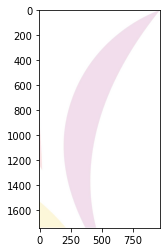

In [39]:
# iterate over PDF pages
for page_index in range(len(pdf_file)):
    # get the page itself
    page = pdf_file[page_index]
    image_list = page.getImageList()
    # printing number of images found in this page
    if image_list:
        print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print("[!] No images found on page", page_index)
    for image_index, img in enumerate(page.getImageList(), start=1):
        # get the XREF of the image
        xref = img[0]
        # extract the image bytes
        base_image = pdf_file.extractImage(xref)
        image_bytes = base_image["image"]
        # get the image extension
        image_ext = base_image["ext"]
        # load it to PIL
        image = Image.open(io.BytesIO(image_bytes))
        plt.imshow(image)
        # save it to local disk
        image.save(open(f"image{page_index+1}_{image_index}.{image_ext}", "wb"))

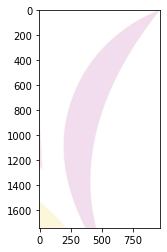

In [38]:
plt.imshow(Image.open("/content/image1_1.jpeg"))

In [41]:
box = [1.5, 22,3.8,26.741]
fc = 28.28
         
for i in range(0, len(box)):
    box[i] *= fc

In [42]:
import tabula as tb
regions_raw = tb.read_pdf(file, pages=[0],area=[box],output_format="json")

Error from tabula-java:
Exception in thread "main" java.lang.IndexOutOfBoundsException: Page number does not exist.
	at technology.tabula.ObjectExtractor.extractPage(ObjectExtractor.java:19)
	at technology.tabula.PageIterator.next(PageIterator.java:30)
	at technology.tabula.CommandLineApp.extractFile(CommandLineApp.java:161)
	at technology.tabula.CommandLineApp.extractFileTables(CommandLineApp.java:124)
	at technology.tabula.CommandLineApp.extractTables(CommandLineApp.java:106)
	at technology.tabula.CommandLineApp.main(CommandLineApp.java:76)




CalledProcessError: ignored